In [ ]:
import os

os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

num_orders = 200000

orders = pd.DataFrame({
    "order_id": range(1, num_orders + 1),
    "customer_id": np.random.randint(1, 50001, num_orders),
    "product_id": np.random.randint(1, 5001, num_orders),
    "order_date": pd.to_datetime("2022-01-01") +
                  pd.to_timedelta(np.random.randint(0, 730, num_orders), unit="D"),
    "quantity": np.random.randint(1, 5, num_orders),
    "discount": np.round(np.random.uniform(0, 0.5, num_orders), 2),
    "order_status": np.random.choice(
        ["Delivered", "Cancelled", "Returned"],
        p=[0.85, 0.1, 0.05],
        size=num_orders
    )
})

orders.to_csv("data/raw/orders.csv", index=False)

In [ ]:
orders["order_date"] = pd.to_datetime(orders["order_date"])
orders = orders.drop_duplicates()

orders = orders[
    (orders["quantity"] > 0) &
    (orders["discount"] >= 0) &
    (orders["discount"] <= 0.5)
]

orders.to_csv("data/processed/orders_cleaned.csv", index=False)

In [ ]:
orders = pd.read_csv("data/processed/orders_cleaned.csv")
orders["order_date"] = pd.to_datetime(orders["order_date"])

In [ ]:
orders["order_month"] = orders["order_date"].dt.to_period("M")

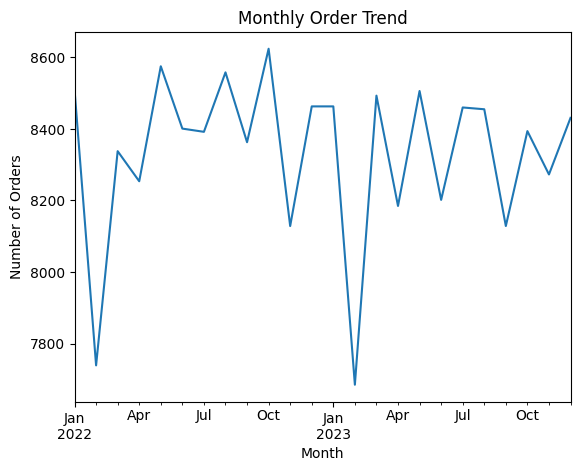

In [ ]:
monthly_orders = orders.groupby("order_month").size()

plt.figure()
monthly_orders.plot()
plt.title("Monthly Order Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

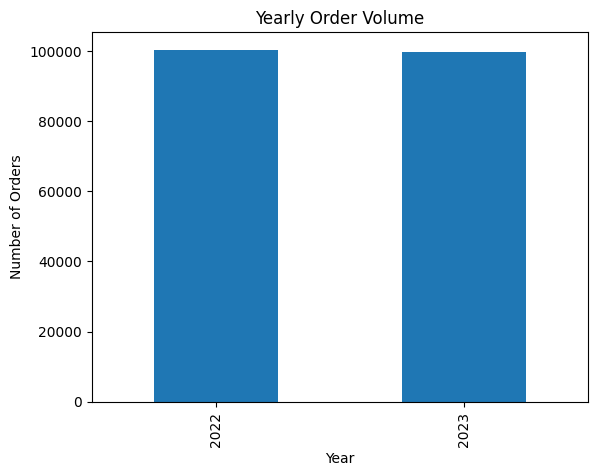

In [ ]:
orders["year"] = orders["order_date"].dt.year

yearly_orders = orders.groupby("year").size()

plt.figure()
yearly_orders.plot(kind="bar")
plt.title("Yearly Order Volume")
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.show()

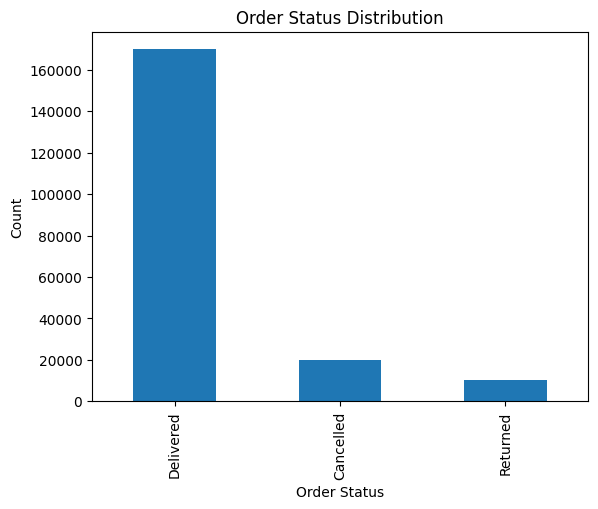

In [ ]:
status_counts = orders["order_status"].value_counts()

plt.figure()
status_counts.plot(kind="bar")
plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Count")
plt.show()

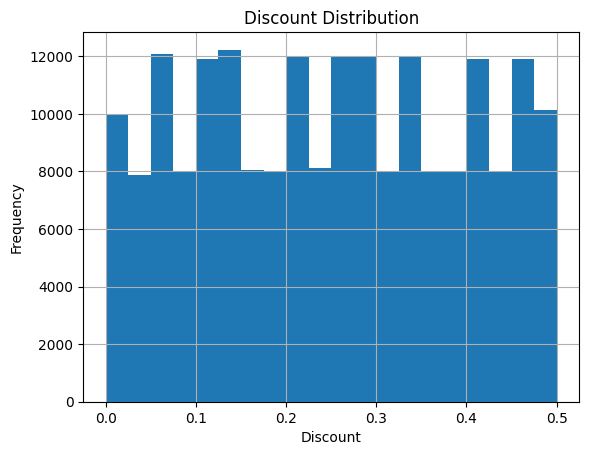

In [ ]:
plt.figure()
orders["discount"].hist(bins=20)
plt.title("Discount Distribution")
plt.xlabel("Discount")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-3635018023.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_orders = orders.groupby("discount_bucket").size()


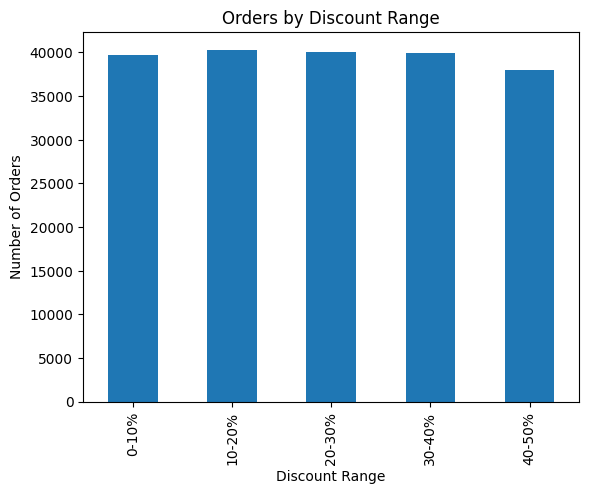

In [ ]:
orders["discount_bucket"] = pd.cut(
    orders["discount"],
    bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5],
    labels=["0-10%", "10-20%", "20-30%", "30-40%", "40-50%"]
)

discount_orders = orders.groupby("discount_bucket").size()

plt.figure()
discount_orders.plot(kind="bar")
plt.title("Orders by Discount Range")
plt.xlabel("Discount Range")
plt.ylabel("Number of Orders")
plt.show()

/tmp/ipython-input-2608081719.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("discount_bucket")
/tmp/ipython-input-2608081719.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  / orders.groupby("discount_bucket").size()


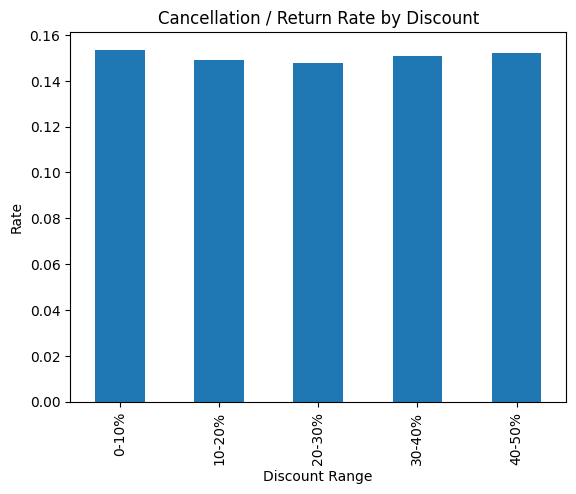

In [ ]:
cancel_rate = (
    orders[orders["order_status"] != "Delivered"]
    .groupby("discount_bucket")
    .size()
    / orders.groupby("discount_bucket").size()
)

plt.figure()
cancel_rate.plot(kind="bar")
plt.title("Cancellation / Return Rate by Discount")
plt.xlabel("Discount Range")
plt.ylabel("Rate")
plt.show()